In [201]:
import os
from datetime import datetime
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import numpy as np



In [202]:
#os.path.dirname(os.path.realpath('SMI_Historical_Data.csv') gets local path to this file and then adds the File to path so File is selected
dataframe = pd.read_csv(os.path.dirname(os.path.realpath('SMI_Historical_Data.csv')) + '/SMI_Historical_Data.csv')

#Gets Column Price and replaces the "," with nothing so that the value can be read as float, then gets cast to float and written into Close column; Same goes for column Change %
dataframe['Close'] = dataframe['Price'].str.replace(',', '').astype(float)
dataframe['Change %'] = dataframe['Change %'].str.replace('%', '').astype(float)

#Turns around the dataset, since the dataset int he csv File is somehow in the wrong way around (The Closest Date is First)
dataframe = dataframe.iloc[::-1]

#Iterates through Date Column and replaces existing value with datetime value
datelist = []
for i in range(0, len(dataframe.index)):
   datelist.append(datetime.strptime(str(dataframe['Date'][i]), '%b %y'))

#Puts the Column Date as Index for the Dataframe
datelist = datelist[::-1]
dataframe.index = datelist

#Drops Column Date since It's now the index and drop column Price to prevent confusion
dataframe.drop('Date', axis=1, inplace=True)
dataframe.drop('Price', axis=1, inplace=True)


dataframe

,Open,High,Low,Vol.,Change %,Close
2020-04-01,"9,311.92","9,948.84","9,036.73",1.72B,3.41,9629.40
2020-05-01,"9,618.93","9,966.05","9,389.66",1.48B,2.10,9831.49
2020-06-01,"9,874.84","10,291.46","9,633.20",1.75B,2.17,10045.30
2020-07-01,"10,027.45","10,535.33","9,984.99",1.27B,-0.39,10005.90
2020-08-01,"10,013.36","10,356.75","9,999.55",903.60M,1.30,10135.56
2020-09-01,"10,228.97","10,591.66","10,091.98",1.36B,0.51,10187.00
2020-10-01,"10,256.95","10,407.01","9,494.52",1.25B,-5.89,9587.15
2020-11-01,"9,595.66","10,644.22","9,556.93",1.52B,9.28,10476.43
2020-12-01,"10,473.33","10,749.68","10,237.94",1.11B,2.17,10703.51
2021-01-01,"10,805.93","11,014.28","10,591.06",1.16B,-1.05,10591.06


Median 							 1.78 %
Erstes Quartil 					-0.455 %
Arithmetische Mittel (ex ante) 	 1.22 %
Geometrisches Mittel (ex post) 	 2.85 %


<AxesSubplot:title={'center':'BoxPlot Renditeverteilung SMI'}>

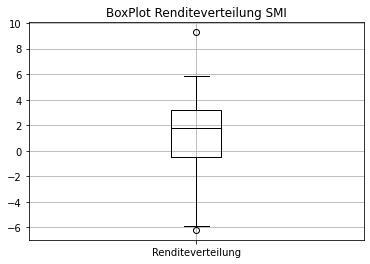

In [203]:

#Create Dataframe in pandas

dataframe['Renditeverteilung'] = round(dataframe['Close'] * 100 / dataframe['Close'].shift() - 100, 2)

dataframe['diskrete Rendite'] = (dataframe['Close'] / dataframe['Close'].shift() - 1) * 100

#Checks for Null or NaN values in the table and replaces them with actual values
if dataframe['Renditeverteilung'].isnull().values.any() or dataframe['diskrete Rendite'].isnull().values.any():
    dataframe["Renditeverteilung"].fillna(dataframe['Change %'], inplace=True)
    dataframe["diskrete Rendite"].fillna(dataframe['Change %'], inplace=True)

geomid = pow(dataframe['diskrete Rendite'][0] * dataframe['diskrete Rendite'][len(dataframe['diskrete Rendite']) - 1],
             1 / 2)

#The next 4 rows are used to diplay the answers to the questions 3a to 3d
print("Median \t\t\t\t\t\t\t " + str(dataframe['Renditeverteilung'].median()) + " %")
print("Erstes Quartil \t\t\t\t\t" + str(dataframe['Renditeverteilung'].describe()['25%']) + " %")
print("Arithmetische Mittel (ex ante) \t " + str(round(dataframe['diskrete Rendite'].mean(), 2)) + " %")
print("Geometrisches Mittel (ex post) \t " + str(round(geomid, 2))  + " %")
dataframe['Renditeverteilung'].plot(kind='box', grid=True, title='BoxPlot Renditeverteilung SMI', color='black')


In [204]:
#Creates DataFrame which is further used for Median Plot generation
df = pd.DataFrame(index=['2022-03-22'])
df.index = pd.to_datetime(df.index)
df['Min_Prediction_Value'] = dataframe['Renditeverteilung'].median() - statistics.pstdev(dataframe['Renditeverteilung'])
df['Median'] = dataframe['Renditeverteilung'].median()
df['Max_Prediction_Value'] = dataframe['Renditeverteilung'].median() + statistics.pstdev(dataframe['Renditeverteilung'])

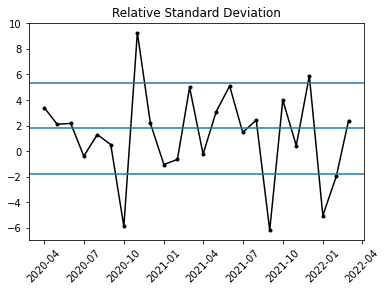

C:\Users\tobia\AppData\Local\Temp\ipykernel_23416\231794513.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dataframe = dataframe.append(pd.Series(name=pd.to_datetime('2022-04-01')))
C:\Users\tobia\AppData\Local\Temp\ipykernel_23416\231794513.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series(name=pd.to_datetime('2022-04-01')))


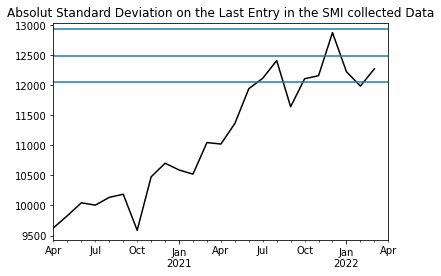

,Open,High,Low,Vol.,Change %,Close,Renditeverteilung,diskrete Rendite
2020-04-01,"9,311.92","9,948.84","9,036.73",1.72B,3.41,9629.40,3.41,3.410000
2020-05-01,"9,618.93","9,966.05","9,389.66",1.48B,2.10,9831.49,2.10,2.098677
2020-06-01,"9,874.84","10,291.46","9,633.20",1.75B,2.17,10045.30,2.17,2.174747
2020-07-01,"10,027.45","10,535.33","9,984.99",1.27B,-0.39,10005.90,-0.39,-0.392223
2020-08-01,"10,013.36","10,356.75","9,999.55",903.60M,1.30,10135.56,1.30,1.295835
2020-09-01,"10,228.97","10,591.66","10,091.98",1.36B,0.51,10187.00,0.51,0.507520
2020-10-01,"10,256.95","10,407.01","9,494.52",1.25B,-5.89,9587.15,-5.89,-5.888387
2020-11-01,"9,595.66","10,644.22","9,556.93",1.52B,9.28,10476.43,9.28,9.275749
2020-12-01,"10,473.33","10,749.68","10,237.94",1.11B,2.17,10703.51,2.17,2.167532
2021-01-01,"10,805.93","11,014.28","10,591.06",1.16B,-1.05,10591.06,-1.05,-1.050590


In [205]:
#Generates Plot (Relative Standard Deviation) with Median and Standard Deviation as line.
plt.figure()
plt.plot(dataframe.index,dataframe['Renditeverteilung'], '.-', color='black')

#Adds Median as well as the respective standard deviation to the Plot
plt.axhline(y=dataframe['Renditeverteilung'].median() + statistics.pstdev(dataframe['Renditeverteilung']))
plt.axhline(y=dataframe['Renditeverteilung'].median())
plt.axhline(y=dataframe['Renditeverteilung'].median() - statistics.pstdev(dataframe['Renditeverteilung']))

plt.title('Relative Standard Deviation')
plt.xticks(rotation=45)
plt.show()


#Generates Plot (Absolut Standard Deviation on the Last Entry in the SMI collected Data) with Median and Standard Deviation as line.
#Creates a new Entry in the dataframe table so that the graph looks nicer
dataframe = dataframe.append(pd.Series(name=pd.to_datetime('2022-04-01')))

#Creates Plot and Calculate Median
dataframe["Close"].plot(title="Absolut Standard Deviation on the Last Entry in the SMI collected Data", color='black')
value = dataframe['Close'][len(dataframe['Close'])-2] * (dataframe['Renditeverteilung'].median() / 100 + 1)

#Adds Median as well as the respective standard deviation to the Plot
plt.axhline(y=value)
plt.axhline(y=dataframe['Close'][len(dataframe['Close'])-2] * (df['Max_Prediction_Value'][len(df['Max_Prediction_Value'])-2]  / 100 + 1))
plt.axhline(y=dataframe['Close'][len(dataframe['Close'])-2] * (df['Min_Prediction_Value'][len(df['Min_Prediction_Value'])-2]  / 100 + 1))

plt.show()
#Deletes the last entry in the dataframe table so that future calculations can still work
dataframe.drop(dataframe.tail(1).index,inplace=True)

#Displays dataframe as table
dataframe



In [206]:
#Create tmp Datatable to generate new median
tmp_median = dataframe['Renditeverteilung'].tolist()
tmp_median.extend(df['Median'].astype(float).tolist())
tmp = pd.DataFrame({'tmp_median': tmp_median})
allValMedian = tmp['tmp_median'].median()
allValStandartabweichung = statistics.pstdev(tmp['tmp_median'])

#Add Row with the initial percentual value of the standard deviation
df.loc[len(df.index)] = [df['Min_Prediction_Value'][len(df['Min_Prediction_Value']) - 1] - allValStandartabweichung,
                         allValMedian,
                         df['Max_Prediction_Value'][len(df['Max_Prediction_Value']) - 1] + allValStandartabweichung]


df

,Min_Prediction_Value,Median,Max_Prediction_Value
2022-03-22 00:00:00,-1.795206,1.78,5.355206
1,-5.299886,1.78,8.859886


,Close,Absolut_Min_Prediction_Value,Absolut_Median,Absolut_Max_Prediction_Value
2020-04-01,9629.400000,9629.400000,9629.400000,9629.400000
2020-05-01,9831.490000,9831.490000,9831.490000,9831.490000
2020-06-01,10045.300000,10045.300000,10045.300000,10045.300000
2020-07-01,10005.900000,10005.900000,10005.900000,10005.900000
2020-08-01,10135.560000,10135.560000,10135.560000,10135.560000
2020-09-01,10187.000000,10187.000000,10187.000000,10187.000000
2020-10-01,9587.150000,9587.150000,9587.150000,9587.150000
2020-11-01,10476.430000,10476.430000,10476.430000,10476.430000
2020-12-01,10703.510000,10703.510000,10703.510000,10703.510000
2021-01-01,10591.060000,10591.060000,10591.060000,10591.060000


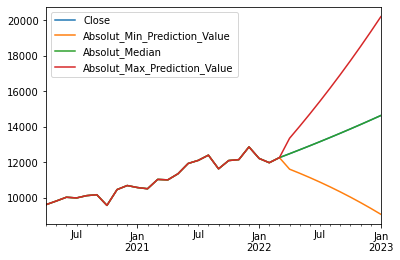

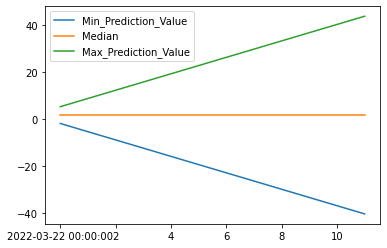

In [207]:
#Create datatable with absolut values
absolut_df = pd.DataFrame(dataframe['Close'])
absolut_df['Absolut_Min_Prediction_Value'] = dataframe['Close']
absolut_df['Absolut_Median'] = dataframe['Close']
absolut_df['Absolut_Max_Prediction_Value'] = dataframe['Close']


#Create 10 entries in Absolut table to display further evolution of SMI
for i in range(0, 10):
    tmp2 = pd.DataFrame({
         'Close':[absolut_df['Close'][len(absolut_df.index) - 1] * ((100 + df['Median'][len(df['Median']) - 1]) / 100)],
         'Absolut_Min_Prediction_Value':[absolut_df['Close'][len(absolut_df.index) - 1] * ((100 + df['Min_Prediction_Value'][len(df['Min_Prediction_Value']) - 1]) / 100)],
         'Absolut_Median':[absolut_df['Close'][len(absolut_df.index) - 1] * ((100 + df['Median'][len(df['Median']) - 1]) / 100)],
         'Absolut_Max_Prediction_Value': [absolut_df['Close'][len(absolut_df.index) - 1] * ((100 + df['Max_Prediction_Value'][len(df['Max_Prediction_Value']) - 1]) / 100)]
    }, index=[absolut_df.index[-1] + relativedelta(months=1)])

    df.loc[len(df.index)] = [df['Min_Prediction_Value'][len(df['Min_Prediction_Value'])-1] - allValStandartabweichung, allValMedian, df['Max_Prediction_Value'][len(df['Max_Prediction_Value']) - 1] + allValStandartabweichung]

    absolut_df = pd.concat([absolut_df, tmp2])

absolut_df.plot()
df.plot()
absolut_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total Dataset:  Date
2000-01-04     7268.100098
2000-01-05     7181.299805
2000-01-06     7280.600098
2000-01-07     7448.000000
2000-01-10     7452.799805
2000-01-11     7420.100098
2000-01-12     7440.200195
2000-01-13     7436.899902
2000-01-14     7513.899902
2000-01-17     7507.000000
2000-01-18     7404.799805
2000-01-19     7336.799805
2000-01-20     7251.200195
2000-01-21     7236.000000
2000-01-24     7127.899902
2000-01-25     6954.799805
2000-01-26     6963.600098
2000-01-27     7113.399902
2000-01-28     7029.600098
2000-01-31     6894.700195
2000-02-01     7025.200195
2000-02-02     7097.399902
2000-02-03     7182.899902
2000-02-04     7148.700195
2000-02-07     7131.299805
2000-02-08     7130.899902
2000-02-09     7031.700195
2000-02-10     6998.000000
2000-02-11     6973.399902
2000-02-14     6921.700195
2000-02-15     6806.399902
2000

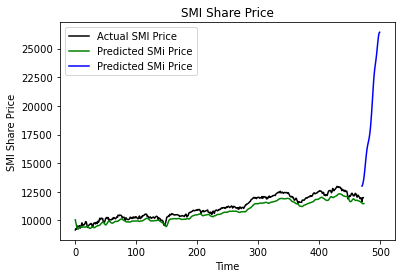

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import datetime as dt
import yfinance as yf  # Import from Yahoofinance API: https://python-yahoofinance.readthedocs.io/en/latest/api.htm

prediction_days = 60
data = pd.DataFrame(yf.download(tickers=['^SSMI'], start='2000-01-01', end='2020-03-01'))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
model = load_model('stock_prediction.smi')

'''Test Model Accuarcy on Existing Data'''

# Load Test data

test_start = dt.datetime(2020, 4, 1)
test_end = dt.datetime(2022, 3, 1)

test_data = pd.DataFrame(yf.download(tickers=['^SSMI'], start=test_start, end=test_end))
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
print('Total Dataset: ', total_dataset)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make Predictions on test data
x_test = []

for x in range(prediction_days, len(model_inputs) + 1):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
# print(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)
# print(prediction_prices[len(prediction_prices) - 1])


print(len(np.array(test_data['Close'])))
x_input = np.array(test_data['Close'][413:]).reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 60
i = 0

while (i < 30):

    if (len(temp_input) > 60):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)
#
# # plt.plot(day_new,scaler.inverse_transform(actual_prices['Close'][150:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))
# print(scaler.inverse_transform(lst_output))
# plt.show()
# Plot test Predictions
plt.plot(actual_prices, color='black', label='Actual SMI Price')
plt.plot(prediction_prices, color='green', label='Predicted SMi Price')
lst_output = lst_output[::-1]
somepred = scaler.inverse_transform(lst_output)
somepred = np.array(somepred)
plt.plot(np.arange(470, 500), somepred, color='blue', label='Predicted SMi Price')
plt.title('SMI Share Price')
plt.xlabel('Time')
plt.ylabel('SMI Share Price')
plt.legend()
plt.show()

df3 = actual_prices.tolist()
df3.extend(somepred)
# plt.plot(df3[400:])

In [209]:
pd.set_option('display.max_rows', None)
#
# print(len(df3))
# letsTryThis = pd.DataFrame(df3[400:])
# letsTryThis = pd.concat([absolut_df, letsTryThis])
# letsTryThis.drop(letsTryThis.tail(17).index,inplace=True)
#
#
# plt.plot(letsTryThis, color='red', label='Prediction')
# plt.plot(absolut_df['Close'], color='green', label='Predicted SMi Price')
# plt.plot(absolut_df['Absolut_Median'], color='yellow', label='asdf SMi Price')
# absolut_df


aksdfj = pd.DataFrame(absolut_df.loc['2022-04-01':]['Close'])
aksdfj['Close'] = somepred[:10]
absolut_df['Close'] = aksdfj['Close']

if absolut_df['Close'].isnull().values.any():
    absolut_df["Close"].fillna(absolut_df['Absolut_Median'], inplace=True)

aksdfj

,Close
2022-04-01,12995.009456
2022-05-01,13117.220095
2022-06-01,13323.237535
2022-07-01,13639.810957
2022-08-01,14073.471853
2022-09-01,14598.250733
2022-10-01,15157.382135
2022-11-01,15682.733573
2022-12-01,16123.313998
2023-01-01,16465.590077


,Close,Absolut_Min_Prediction_Value,Absolut_Median,Absolut_Max_Prediction_Value
2020-04-01,9629.400000,9629.400000,9629.400000,9629.400000
2020-05-01,9831.490000,9831.490000,9831.490000,9831.490000
2020-06-01,10045.300000,10045.300000,10045.300000,10045.300000
2020-07-01,10005.900000,10005.900000,10005.900000,10005.900000
2020-08-01,10135.560000,10135.560000,10135.560000,10135.560000
2020-09-01,10187.000000,10187.000000,10187.000000,10187.000000
2020-10-01,9587.150000,9587.150000,9587.150000,9587.150000
2020-11-01,10476.430000,10476.430000,10476.430000,10476.430000
2020-12-01,10703.510000,10703.510000,10703.510000,10703.510000
2021-01-01,10591.060000,10591.060000,10591.060000,10591.060000


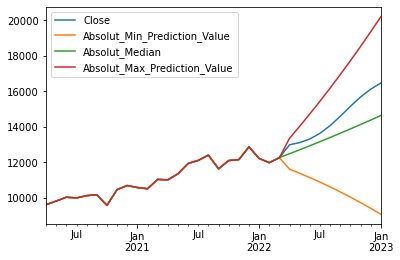

In [210]:


absolut_df.plot()
absolut_df